# 데이터 가져오기

In [21]:
# 데이터를 가져온다. 첫번째 열에 단어 입력되어있음

SAVE = './data/1important.csv'

datas=[]
with open(SAVE, 'r') as save:
    for line in save:
        datas.append(line.strip().replace(',',''))


In [22]:
print(datas)

['협치', '공존', '이해', '사람', '소통', '협력', '다함께', '신뢰', '시민', '구민', '우리', '공동', '타협', '설득', '공유', '신뢰', '문화', '노력', '제안', '투표', '협조', '노력', '권한', '지역', '풀뿌리', '소통', '배려', '상호이해', '참여', '함께', '친밀', '민주', '공동체', '참여', '협력', '이해', '소통', '오픈마인드', '예산', '아이디어', '공간', '평등', '논의', '협업', '협의', '느긋함', '이해', '존중', '이해', '우리', '노력', '배려', '민주', '이해', '협의', '공존', '소통', '느긋함', '노력', '이해', '소통', '다함께', '설득', '참여', '소통', '참여', '이해', '타협', '협조', '지역', '친밀', '참여', '소통', '아이디어', '느긋함', '민주', '이해', '공존', '이해', '다함께', '타협', '노력', '제안', '소통', '협력', '다함께', '신뢰', '권한', '지역', '풀뿌리', '소통', '우리', '배려', '이해', '소통', '지역', '친밀', '이해', '소통', '공동', '신뢰', '협조', '소통', '민주', '소통', '다함께', '이해', '이해', '존중', '이해', '설득', '노력', '함께', '이해', '협력', '권한', '친밀', '소통', '타협', '지역', '참여', '공존', '소통', '공유', '예산', '민주', '느긋함', '소통', '이해', '다함께', '친밀', '소통', '이해', '권한', '협치', '소통', '공동', '노력', '상호이해', '이해', '평등', '이해', '타협', '소통', '지역', '민주', '노력', '친밀', '공존', '민주', '친밀']


# 결과 정리

In [23]:
# 워드클라우드 준비
%matplotlib inline

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [28]:
# most common 단어 정리

def words_most_common(words):
    words_count=Counter()
    words_count.update(words)   # , 로 분류된 단어들은 한번에 들어감
   
    return words_count.most_common()

In [29]:
words_count = words_most_common(datas)

In [72]:
print(words_count)

[('이해', 19), ('소통', 19), ('노력', 8), ('친밀', 7), ('민주', 7), ('다함께', 6), ('지역', 6), ('참여', 6), ('공존', 5), ('타협', 5), ('협력', 4), ('신뢰', 4), ('권한', 4), ('느긋함', 4), ('우리', 3), ('공동', 3), ('설득', 3), ('협조', 3), ('배려', 3), ('협치', 2), ('공유', 2), ('제안', 2), ('풀뿌리', 2), ('상호이해', 2), ('함께', 2), ('예산', 2), ('아이디어', 2), ('평등', 2), ('협의', 2), ('존중', 2), ('사람', 1), ('시민', 1), ('구민', 1), ('문화', 1), ('투표', 1), ('공동체', 1), ('오픈마인드', 1), ('공간', 1), ('논의', 1), ('협업', 1)]


In [55]:
# 답변 요약 정리

reply_count = len(datas)   #답변 전체 숫자
words_set = len(words_count)   #답변 종류 개수

def word(i): return words_count[int(i)-1][0]
def word_count(i): return words_count[(int(i)-1)][1]
def word_ranking(i):
    results = '{}({}건, {}%)'.format(word(i),word_count(i),int(words_count[int(i)-1][1]/reply_count*100))
    return results

In [114]:
# 답변 요약 정리 표시
print("총 {}개의 답변 중 중복을 제외하면 {} 종류의 답변이 나왔습니다.\n".format(reply_count, words_set))
print("가장 많이 나온 답변순으로 {}, {}, {} (으)로 나왔습니다. \n\n". \
      format(word_ranking(1),word_ranking(2),word_ranking(3)))   

print('※ 상위 10개 답변')
for i in range(10):
    print('   -{}번째: {}'.format(i+1, word_ranking(i+1)))

총 151개의 답변 중 중복을 제외하면 40 종류의 답변이 나왔습니다.

가장 많이 나온 답변순으로 이해(19건, 12%), 소통(19건, 12%), 노력(8건, 5%) (으)로 나왔습니다. 


※ 상위 10개 답변
   -1번째: 이해(19건, 12%)
   -2번째: 소통(19건, 12%)
   -3번째: 노력(8건, 5%)
   -4번째: 친밀(7건, 4%)
   -5번째: 민주(7건, 4%)
   -6번째: 다함께(6건, 3%)
   -7번째: 지역(6건, 3%)
   -8번째: 참여(6건, 3%)
   -9번째: 공존(5건, 3%)
   -10번째: 타협(5건, 3%)




# 워드클라우드 만들기

 - 참고1: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
 - 참고2: http://pinkwink.kr/1029

In [144]:
# mask 이미지대로 워드클라우드 표시하기


%matplotlib inline
import sys
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

def make_word_cloud_in_mask(words_counter, max_words, save_path, mask_img, relative):
    '''
    단어 카운터 자료 입력 --> 마스크 이미지에 맞춰 워드클라우드 보여줌
    '''
    words = words_counter
    
    #mask 이미지를 불러온다
    mask = np.array(Image.open(mask_img))
    image_colors = ImageColorGenerator(mask)  #mask 이미지의 색상을 가져온다
    
    # 폰트 설정
    if sys.platform in ["win32", "win64"]:
        font_path = "c:/Windows/Fonts/malgun.ttf"
    elif sys.platform == "darwin":
        fornt_path = "c:/Windows/Fonts/AppleGothic.ttf"

    tmp = dict(words)
    wordcloud=WordCloud(font_path=font_path, relative_scaling=relative, mask=mask,  # relative_scaling  0에 가까울수록 순위, 1에 가까울수록 실제 카운트
                        background_color='White', max_words=max_words, prefer_horizontal=1,    #prefer_horizontal = 1  모두 다 가로로
                       min_font_size = 4).generate_from_frequencies(tmp)      #mode = 'RGBA', background_color = None --> 배경투명하게
    
    plt.figure(figsize=(16,8))      # 16,8 일경우  1600픽셀X800픽셀
#     plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
#     plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")   # 마스크 색상으로 변경한다
    plt.axis('off')

    #파일명 확인 필요
    plt.savefig(save_path)

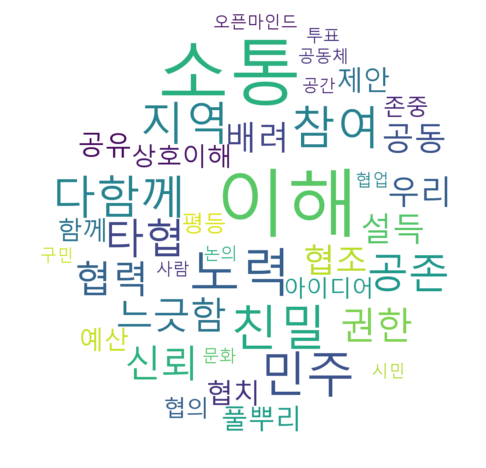

In [147]:
MAX_WORDS = 100
MASK_IMG_PATH = 'yellow.jpg'
RELATIVE = 0.5     # relative_scaling  0에 가까울수록 순위, 1에 가까울수록 실제 카운트
etc = 'white'   #기타 기억해야 할 부분
SAVE_PATH = './result/wordcloud_{}_{}_{}.png'.format(MAX_WORDS,RELATIVE,etc)

make_word_cloud_in_mask(words_count, MAX_WORDS, SAVE_PATH, MASK_IMG_PATH, RELATIVE)

In [69]:
? WordCloud

In [135]:
# 파이차트 그려보기
words_count
answer = []
counts = []
target = 15    # target 순위 이하인 경우 기타로 통합한다

for i, word_count in enumerate(words_count):
    if i < target:
        answer.append(word_count[0])
        counts.append(word_count[1])
        
    elif i == target:
        answer.append('기타')
        counts.append(word_count[1])
        
    elif i > target:
        counts[target]+=word_count[1]



([<matplotlib.patches.Wedge at 0x73833e95c0>,
  <matplotlib.text.Text at 0x738365c160>])

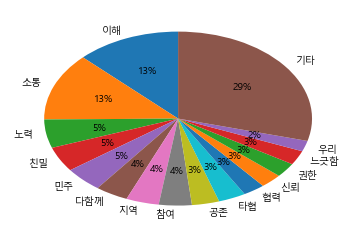

In [137]:
plt.pie(counts, labels = answer, startangle = 90, autopct = '%1.f%%')